# Importation des modules

In [2]:
# Pour manipuler et visualiser les données
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Pour faire des tests statistiques
from scipy import stats
from scipy.stats import f_oneway, kruskal
import statsmodels.formula.api as smf

# 1. Analyse univariée de chaque variable

On commence par créer notre dataframe en prenant en compte l'étape du nettoyage de données.

In [3]:
dataset = pd.read_csv("dataset.csv")

# On supprime le doublon
dataset = dataset.drop_duplicates()

# Affichage
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1.1. Variables catégorielles et variables continues

Avant de visualiser les données, on va diviser notre dataset selon le type de variables: les variables catégorielles et continues.<br>
Cela nous permettra de choisir les plots et les statistiques appropriés pour chaque type de variable.

In [4]:
# Notre dataset contient seulement 7 variables, on peut grouper "manuellement" les variables selon leur type

df_categories = dataset.iloc[:, [1,3,4,5]]
df_continues = dataset.iloc[:, [0,2,6]]

Dataframe contenant les variables catégorielles : 

In [5]:
df_categories

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


On peut considérer le nombre d'enfants comme une variable catégorique  parce qu'il prend un nombre limité de valeurs.

In [6]:
df_categories['children'].unique()

array([0, 1, 3, 2, 5, 4])

Dataframe contenant les variables continues :

In [7]:
df_continues

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


On génère un tableau de synthèse statistique :

In [8]:
df_continues.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


## 1.2. Analyse des variables catégorielles

Voici la liste des variables ainsi que leurs valeurs :

In [9]:
df_categories.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [10]:
for colonne in df_categories.columns:
    print(f"{colonne}: {df_categories[colonne].unique()}")

sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


### 1.2.1 Répartition des hommes et des femmes

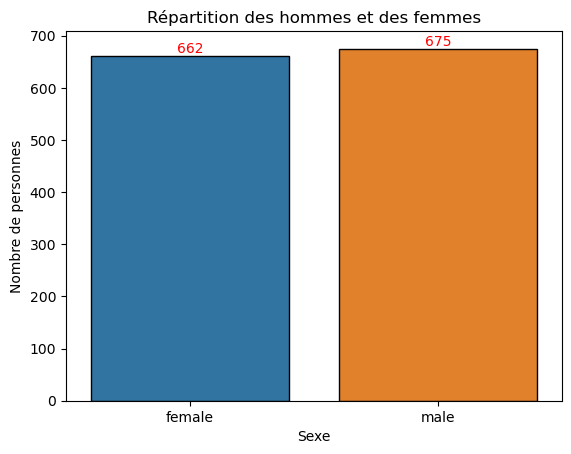

In [11]:
# On crée le diagramme à barres en spécifiant la colonne à utiliser comme variable catégorique
ax = sns.countplot(x='sex', data=df_categories, edgecolor='k', linewidth=1)

# Titre et noms des axes
plt.title("Répartition des hommes et des femmes")
plt.xlabel("Sexe")
plt.ylabel("Nombre de personnes")

# Affichage des valeurs de chaque catégorie sur le graphique
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, color='red', ha='center', va='bottom')

# Afficher le graphique
plt.show()

D'après le diagramme, il y a quasiment le même nombre d'hommes et de femmes dans notre dataset.

### 1.2.2 Distribution du nombre d'enfants

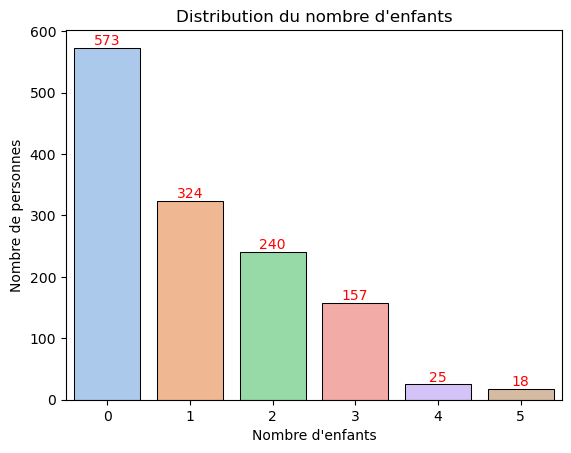

In [12]:
ax = sns.countplot(x='children', data=df_categories, palette='pastel', edgecolor='k', linewidth=0.75)

# Titre et noms des axes
plt.title("Distribution du nombre d'enfants")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de personnes")

# Affichage des valeurs de chaque catégorie sur le graphique
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, color='red', ha='center', va='bottom')

# Afficher le graphique
plt.show()

La majorité des individus ont zéro ou un enfant, un peu moins d'un tiers des personnes ont entre 2 et 3 enfants et seule une poignée d'individus ont en plus de 4.

### 1.2.3. Proportion de fumeurs et de non fumeurs

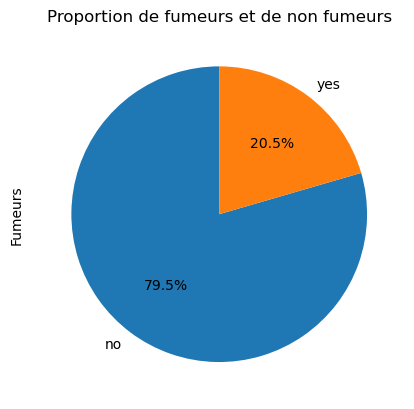

In [13]:
# On compte le nombre d'occurences de fumeurs et de non fumeurs 
counts = df_categories['smoker'].value_counts()

# Création du diagramme en secteurs
counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Titre
plt.title("Proportion de fumeurs et de non fumeurs")
plt.ylabel("Fumeurs")

# Show the plot
plt.show()


Un peu plus des trois quarts des personnes ne fument pas.

### 1.2.4. Répartition des gens selon la région

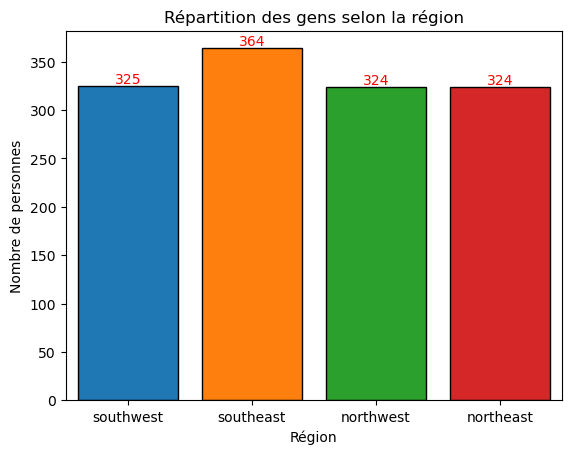

In [14]:
# On crée le diagramme à barres en spécifiant la colonne à utiliser comme variable catégorique
ax = sns.countplot(x='region', data=df_categories, edgecolor='k', linewidth=1, saturation=50)

# Titre et noms des axes
plt.title("Répartition des gens selon la région")
plt.xlabel("Région")
plt.ylabel("Nombre de personnes")

# Affichage des valeurs de chaque catégorie sur le graphique
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=10, color='red', ha='center', va='bottom')

# Afficher le graphique
plt.show()

Les gens sont répartis équitablement dans chaque region, avec un peu plus de personnes au Sud Est.

## 1.3. Analyse des variables continues

### 1.3.1. Diagrammes en boîte (Boxplot) et statistiques de base

On réalise des boxplot pour visualiser la dispersion et les valeurs éventuellement aberrantes.

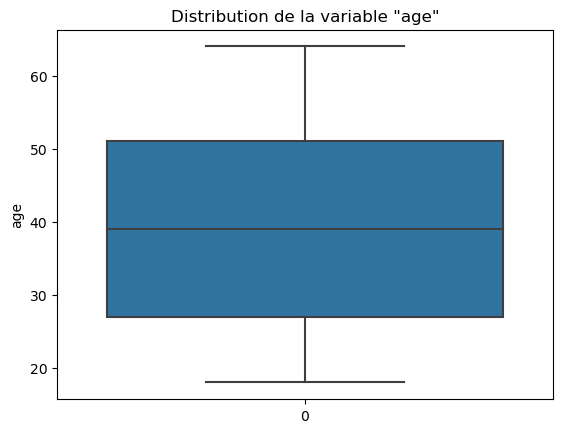

Minimum : 18
Q1 : 27.0
Médiane : 39.0
Q3: 51.0
Maximum : 64

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

Series([], Name: age, dtype: int64) 

Il y a 0 valeurs aberrantes 

-------------------------------------------



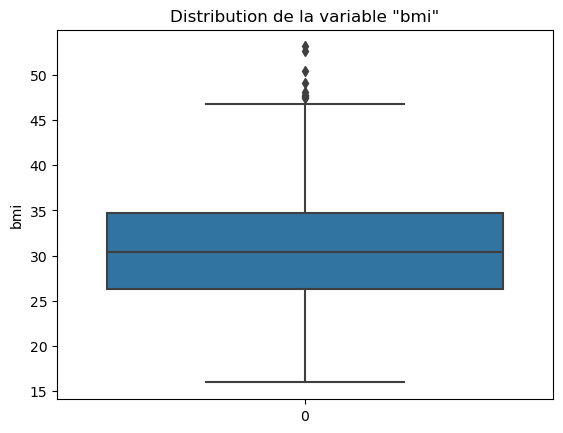

Minimum : 15.96
Q1 : 26.29
Médiane : 30.4
Q3: 34.7
Maximum : 53.13

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64 

Il y a 9 valeurs aberrantes 

-------------------------------------------



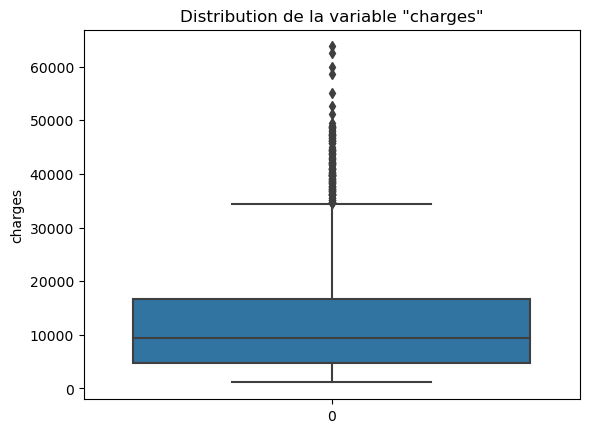

Minimum : 1121.87
Q1 : 4746.34
Médiane : 9386.16
Q3: 16657.72
Maximum : 63770.43

valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64 

Il y a 139 valeurs aberrantes 

-------------------------------------------



In [15]:
liste_colonnes = list(df_continues.columns)

for var in liste_colonnes:

    # Sélection de la variable à tracer
    variable = df_continues[var]
    
    # Titre et axe
    plt.title(f'Distribution de la variable "{var}"')
    plt.ylabel(f"{var}")

    # Tracé du boxplot
    sns.boxplot(variable)
    plt.show()
    
    # Minimum et Maximum
    minimum = round(variable.min(),2)
    maximum = round(variable.max(),2)

    # Calcul des quartiles et médiane
    mediane = round(variable.median(),2)
    q1, q3 = round(variable.quantile([0.25, 0.75]),2)
    
    # Calcul de l'intervalle interquartile (IQR)
    iqr = q3 - q1
    
    # Détermination des bornes des outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Sélection des valeurs aberrantes
    outliers = variable[(variable < lower_bound) | (variable > upper_bound)]

    # Affichage des indicateurs
    print(f"Minimum : {minimum}")
    print(f"Q1 : {q1}")
    print(f"Médiane : {mediane}")
    print(f"Q3: {q3}")
    print(f"Maximum : {maximum}\n")

    # Affichage des valeurs aberrantes
    print("valeurs atypiques < Q1-1.5*IQR) | > Q3+1.5*IQR :\n")
    print(outliers, "\n")
    print(f"Il y a {len(outliers)} valeurs aberrantes","\n")
    print("-------------------------------------------\n")

### 1.3.2. Histogrammes et transformations logarithmiques

On visualise la répartition des valeurs pour chaque variable, puis on regarde si elles suivent une loi normale après transformation logarithmique (pour pouvoir éventuellement faire des tests ANOVA par exemple).

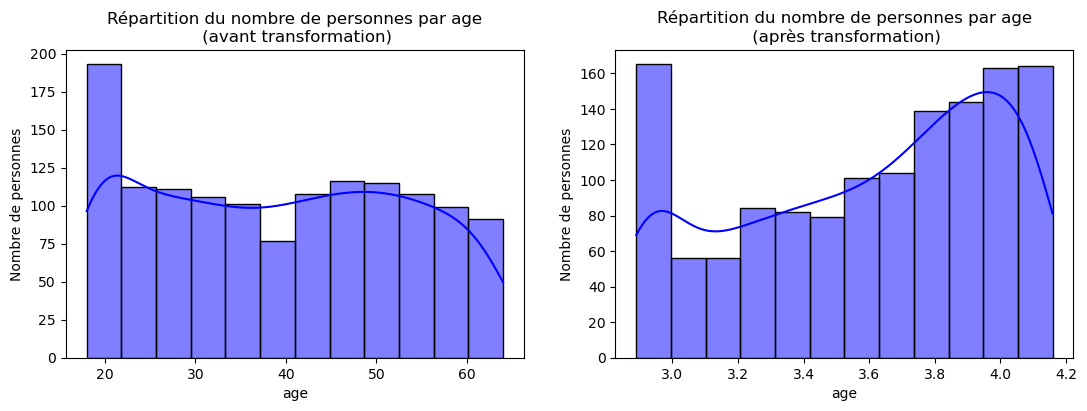

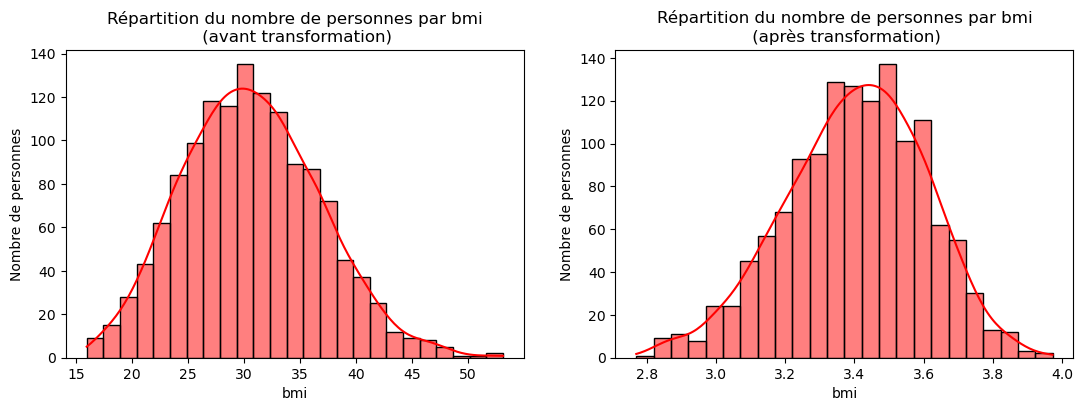

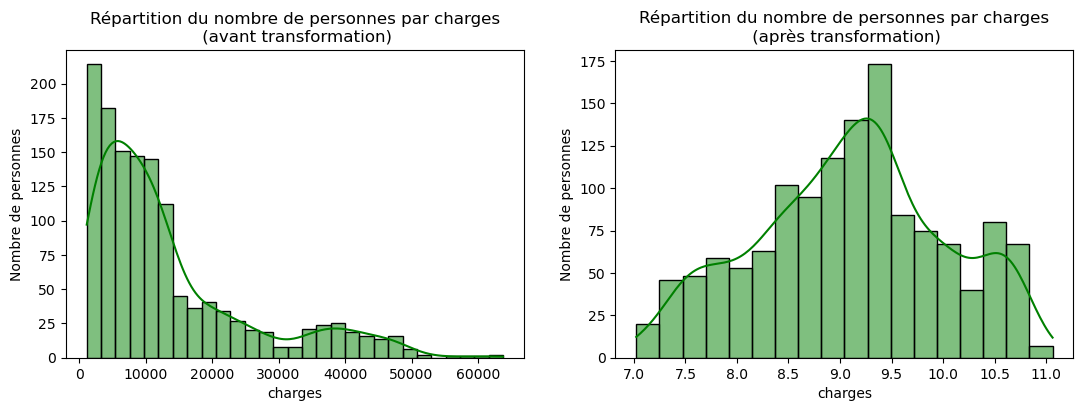

In [16]:
df_log = np.log(df_continues)
liste_col = list(df_continues.columns)

# Création d'une palette de couleurs en utilisant une liste de couleurs
palette = sns.color_palette(['blue', 'red', 'green'])

# Association d'une couleur à chaque variable

for col, couleur in zip(liste_col, palette):
    # Création de la figure et des subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

    # Premier histogramme
    sns.histplot(data=df_continues, x=col, ax=ax1, color=couleur, kde=True)
    ax1.set_title(f"Répartition du nombre de personnes par {col}\n (avant transformation)")
    ax1.set_ylabel("Nombre de personnes")

    # Second histogramme
    sns.histplot(data=df_log, x=col, ax=ax2, color=couleur, kde=True)
    ax2.set_title(f"Répartition du nombre de personnes par {col}\n (après transformation)")
    ax2.set_ylabel("Nombre de personnes")

    # Affichage de la figure
    plt.show()

Seule la variable "bmi" suit une distribution normale.

# 2. Analyses bivariées et tests statistiques

## 2.1. Corrélation des variables continues avec la variable cible "charges"

On définit une fonction pour tracer des scatterplot et afficher le coefficient de Pearson :

In [17]:
def scatterplot_corr(colonne1, colonne2):
    # Sélection de la colonne colonne1 et de la variable cible
    data = df_continues[[colonne1, colonne2]]

    # Affichage du scatterplot
    plt.title(f'Distribution des {colonne2} selon la variable "{colonne1}"')
    sns.scatterplot(x=colonne1, y=colonne2, data=data)
    plt.show()

    # Calcul de la corrélation
    corr = data[colonne2].corr(data[colonne1])
    print(f"Le coefficient de Pearson vaut {round(corr,3)}")

On visualise maintenant les corrélations :

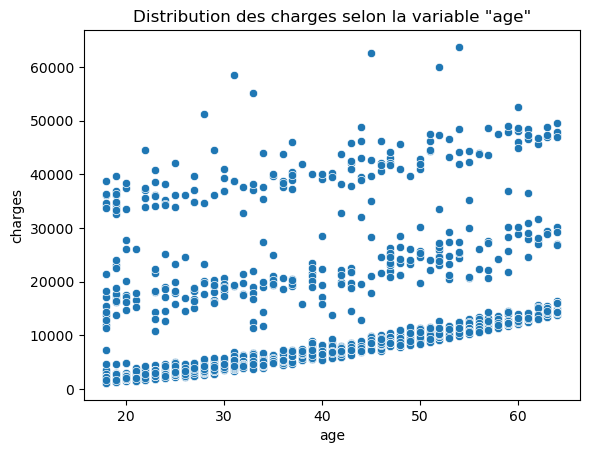

Le coefficient de Pearson vaut 0.298


In [18]:
scatterplot_corr("age","charges")


Il y a donc une faible corrélation positive entre ces deux variables. 

On visualise la répartition avec des boxplots pour en avoir une autre vision :

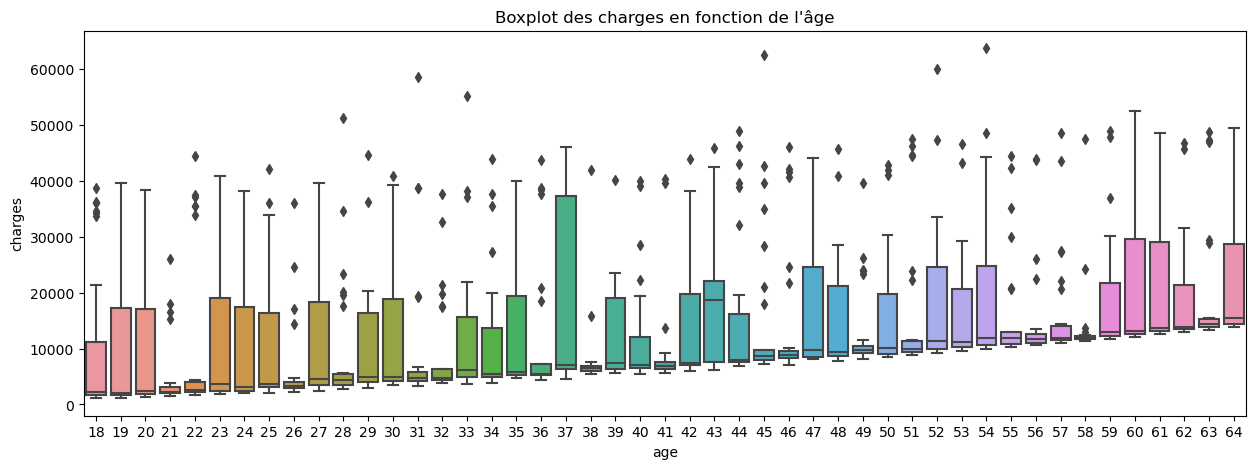

In [19]:
plt.figure(figsize=(15,5))

plt.title("Boxplot des charges en fonction de l'âge")

sns.boxplot(x='age', y='charges', data=df_continues)

plt.show()

Comme le montre le boxplot, les valeurs de 'charges' tendent à augmenter lorsque les valeurs d'âge augmentent. Cependant, la corrélation n'est pas forcément causale et ne peut pas être utilisée pour en déduire une relation causale entre les variables.<br>
On peut néanmoins supposer que les "trous" que l'on observe dans la tendance générale sont dûs à notre jeu de données limité, et que l'âge est un critère pris en compte pour le montant des "charges".

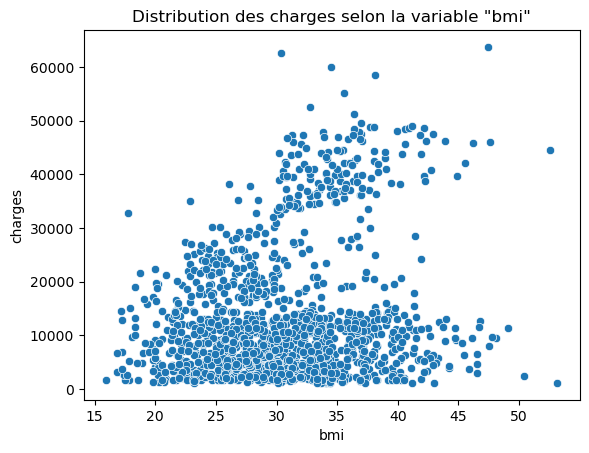

Le coefficient de Pearson vaut 0.198


In [20]:
scatterplot_corr("bmi","charges")


Il y a donc une très faible corrélation positive entre les deux variables. Cependant, on remarque une certaine tendance : les charges les plus élevées correspondent à des bmi élevé.

## 2.2. Relation entre les variables catégorielles et la variable "charges"

### 2.2.1. Charges et statut fumeur

Est-ce que le fait d'être fumeur ou non a un impact sur les "charges" ?

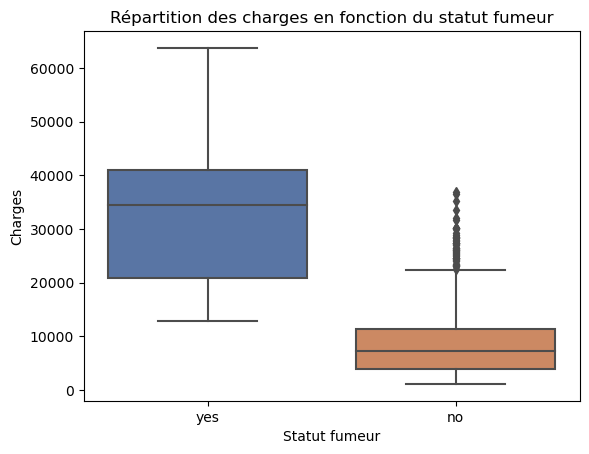

In [21]:
sns.boxplot(x='smoker', y='charges', data=dataset, palette='deep')

plt.title('Répartition des charges en fonction du statut fumeur')
plt.xlabel('Statut fumeur')
plt.ylabel('Charges')

plt.show()

Le boxplot montre clairement que le statut "fumeur ou non" impacte fortement le montant des "charges". Par exemple, 75% des charges des fumeurs sont supérieures à 10 000, alors que 75% des charges des non-fumeurs sont inférieures à 10 000.

Réalisons un test statistique pour valider nos observations : le test de Kruskal-Wallis est un test non paramétrique approprié pour cette situation, car il ne nécessite pas que les données suivent une distribution normale et il peut être utilisé lorsque les variances des groupes sont différentes.
<p> L'hypothèse nulle est que les médianes des différents groupes (ici, les fumeurs et non fumeurs) sont égales. 

In [22]:
# fonction pour changer les valeurs "yes" et "no" en "1" et "0" (smoker)
def binary_encode(x):
  if x == 'yes':
    return 1
  elif x == 'no':
    return 0
  else:
    raise ValueError("Invalid input for binary encoding")

In [23]:
dataset['smoker'] = dataset['smoker'].apply(lambda x : binary_encode(x))
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [24]:
# Sélection des données de la colonne "charges" en fonction de la colonne "smoker"
data = [dataset[dataset['smoker'] == r]['charges'] for r in dataset['smoker'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")

statistic = 588.347, p_value = 0.000


La p-valeur de 0,000 indique que la probabilité que ces résultats soient observés alors que l'hypothèse nulle est vraie est très faible. En conséquence, on peut conclure que le statut fumeur est un critère pour le montant des "charges".

### 2.2.2. Charges et sexe

Regardons s'il y a une discrimination entre les hommes et les sexes sur le montant des "charges".

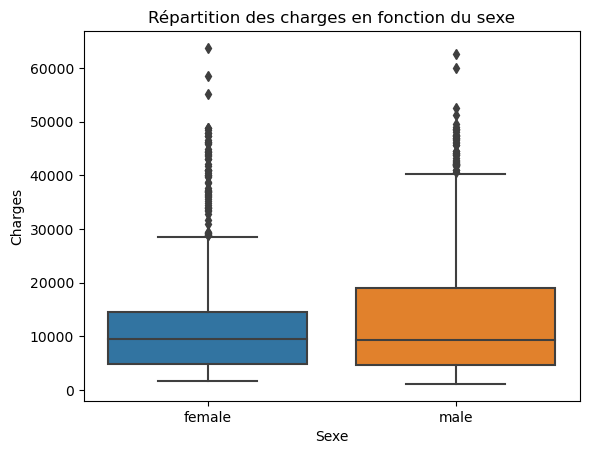

In [25]:
sns.boxplot(x='sex', y='charges', data=dataset)

plt.title('Répartition des charges en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Charges')

plt.show()

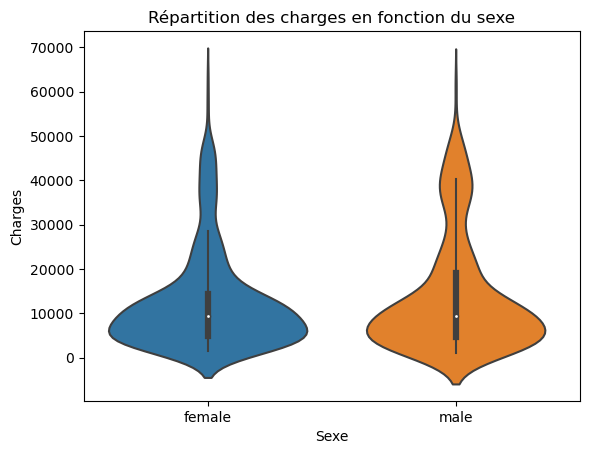

In [26]:
sns.violinplot(x='sex', y='charges', data=dataset)

plt.title('Répartition des charges en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Charges')

plt.show()

Les "charges" se répartissent sensiblement de la même manière selon le sexe. La variable 'sex' n'est pas une variable explicative de notre target "charges".

In [27]:
groups = dataset.groupby('sex')['charges'].apply(list)
stat, p = stats.kruskal(*groups)

print("Statistique de test : %.3f, p-value : %.3f" % (stat, p))

Statistique de test : 0.154, p-value : 0.694


### 2.2.3. Charges et nombre d'enfants

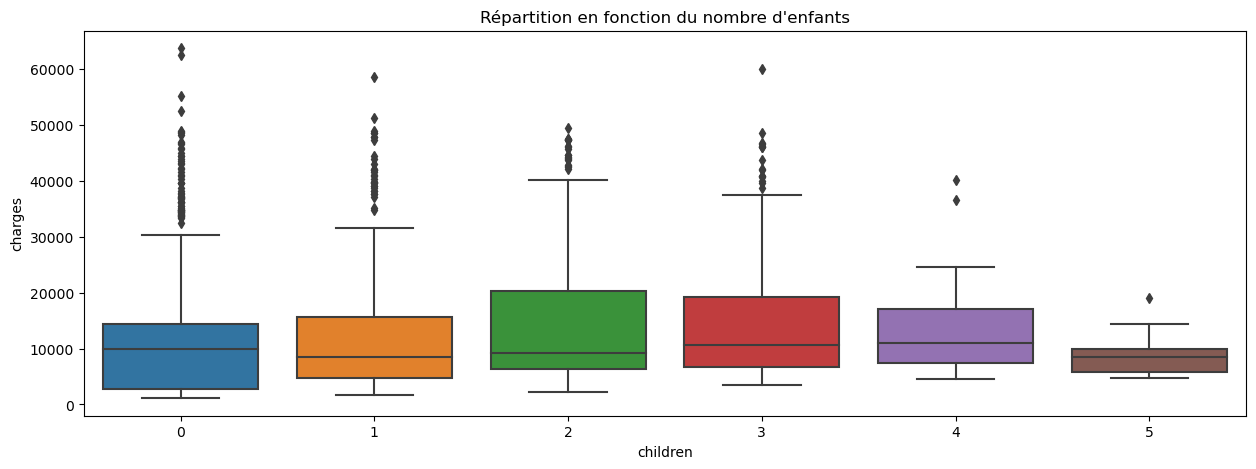

In [28]:
plt.figure(figsize=(15,5))

plt.title("Répartition en fonction du nombre d'enfants")

sns.boxplot(x='children', y='charges', data=dataset)

plt.show()

On remarque qu'au delà de 4 enfants, la répartiton des charges est plus ressérrée et l'amplitude beaucoup plus faible. 

Réalisons un test statistique pour valider nos observations : le test de Kruskal-Wallis est un test non paramétrique approprié pour cette situation, car il ne nécessite pas que les données suivent une distribution normale et il peut être utilisé lorsque les variances des groupes sont différentes.
<p> L'hypothèse nulle est que les médianes des différents groupes (ici, les différents nombres d'enfants) sont égales. 

In [29]:
# Sélection des données de la colonne "charges" en fonction de la colonne "children"
data = [dataset[dataset['children'] == r]['charges'] for r in dataset['children'].unique()]

# Calcul du test de Kruskal-Wallis
stat, p_value = kruskal(*data)

# Affichage du résultat
print(f"statistic = {stat:.3f}, p_value = {p_value:.3f}")

statistic = 29.121, p_value = 0.000


La p-valeur de 0,000 indique que la probabilité que ces résultats soient observés alors que l'hypothèse nulle est vraie est très faible. En conséquence, on peut conclure que le nombre d'enfants est un critère pour le montant des "charges".

### 2.2.4. Charges et régions

Comment se répartissent les charges selon la région ?

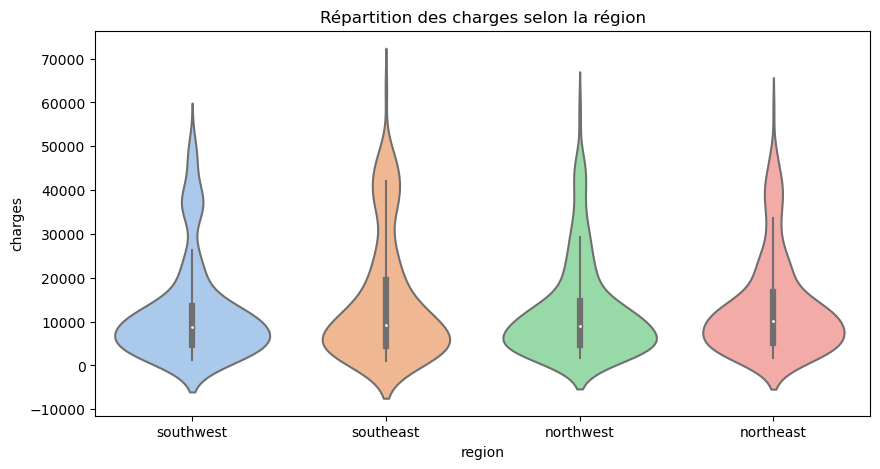

In [30]:
plt.figure(figsize=(10,5))
plt.title("Répartition des charges selon la région")

sns.violinplot(x='region', y='charges', data=dataset, palette='pastel', edgecolor='k', linewidth=1.5)

plt.show()

In [31]:
region_groups = dataset.groupby('region')['charges'].apply(list)
stat, p = stats.kruskal(*region_groups)

print("Statistique de test : %.3f, p-value : %.3f" % (stat, p))

Statistique de test : 4.623, p-value : 0.202


Les "charges" ne changent pas vraiment selon la région, donc la variable "region" n'est pas important pour expliquer la variable cible "charge".

/tmp/ipykernel_6909/3959544466.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in grouped_data.groupby(['region']):


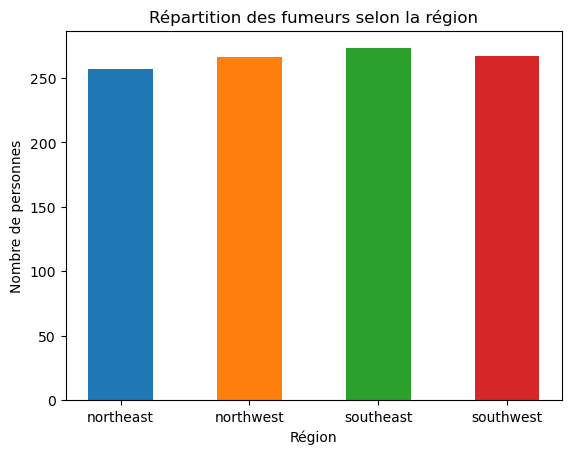

In [32]:
# Grouper les données par région et compter le nombre de fumeurs et non-fumeurs dans chaque groupe
grouped_data = dataset.groupby(['region', 'smoker']).size().reset_index(name='counts')

# Tracer le graphique en utilisant matplotlib
fig, ax = plt.subplots()
ax.set_title("Répartition des fumeurs selon la région")
ax.set_xlabel("Région")
ax.set_ylabel("Nombre de personnes")
for key, grp in grouped_data.groupby(['region']):
    ax.bar(key, grp['counts'], width=0.5, label=grp['smoker'])
plt.show()

## 2.3. Analyses bivariées supplémentaires

### 2.3.1. Répartition des fumeurs et non fumeurs selon le sexe

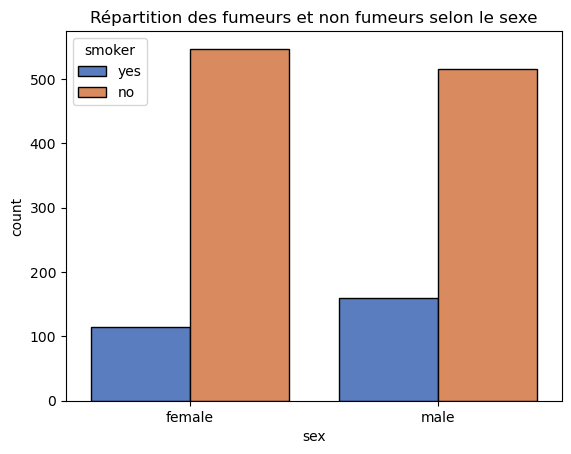

In [33]:
# Sélection des colonnes "sex" et "smoker"
data = df_categories[["sex", "smoker"]]

# Titre
plt.title("Répartition des fumeurs et non fumeurs selon le sexe")

# Affichage du graphique
sns.countplot(x="sex", hue="smoker", data=data, palette='muted', edgecolor='k')
plt.show()

La plupart des hommes et des femmes ne sont pas fumeurs.

### 2.3.2. Distribution des ages selon le sexe

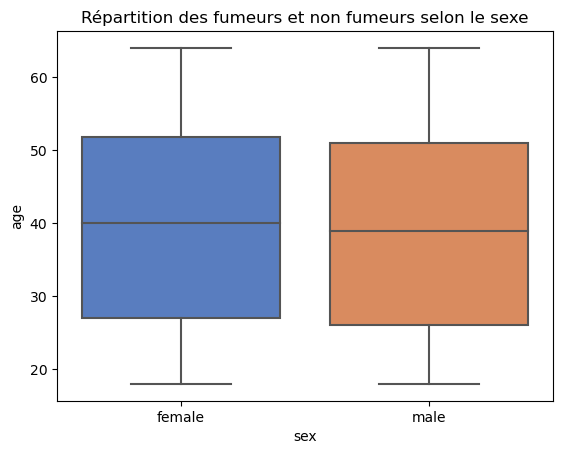

In [34]:
# Sélection des colonnes "sex" et "age"
data = dataset[["sex", "age"]]

# Titre
plt.title("Répartition des fumeurs et non fumeurs selon le sexe")

# Affichage du graphique
sns.boxplot(x="sex", y="age", data=data, palette='muted')
plt.show()

La distribution des âges ne change quasiment pas selon le sexe.

# 3. Analyses multivariées et modèles statistiques

Dans cette section, on va étudier la variable cible "charges" en fonction de plusieurs variables. L'étude ne sera pas exhaustif mais on va se concentrer sur quelques associations de variables qui semblent pertinentes.
<p> Les analyses bivariées ont montrées que l'âge, le fait de fumer, le nombre d'enfant et le fait de fumer ou non sont les principales variables de notre dataset ayant un impact sur la variable cible "charges".

## 3.1. Charges en fonction de l'âge et du bmi

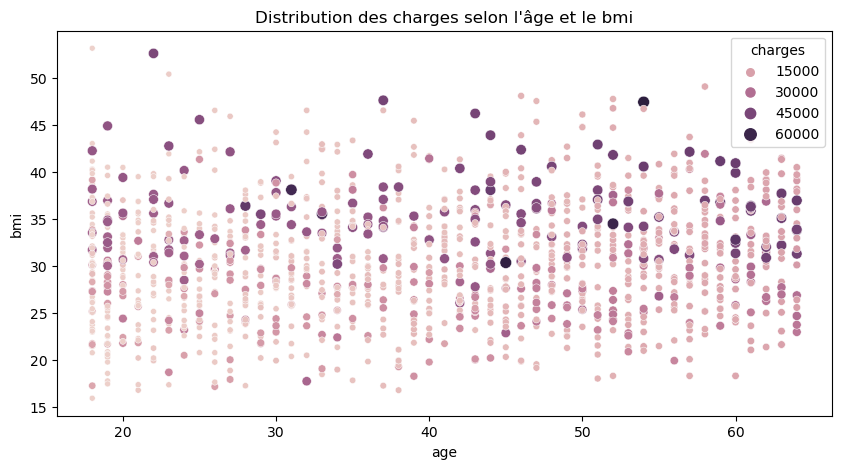

In [35]:
# dataframe avec les colonnes qui nous intéressent
data = dataset[['charges', 'age', 'bmi']]

plt.figure(figsize=(10,5))

plt.title("Distribution des charges selon l'âge et le bmi")
sns.scatterplot(x='age', y='bmi', hue='charges', data=data, size='charges')
plt.show()

Ce nuage de points permet de conjecturer que les charges ont tendances à être plus élevés lorsque l'age et le bmi le sont tous les deux.

Pour vérifier si la variable "charges" dépend des variables "age" et "bmi", on peut utiliser une régression linéaire multiple.<br> 
Cette modélisation statistique cherche les coefficients de régression qui permettent de minimiser l'erreur quadratique moyenne (MSE). 

In [36]:
model = smf.ols(formula='charges ~ age + bmi', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     88.21
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.05e-36
Time:                        16:33:07   Log-Likelihood:                -14384.
No. Observations:                1337   AIC:                         2.877e+04
Df Residuals:                    1334   BIC:                         2.879e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6403.0540   1744.905     -3.670      0.0

Selon les résultats de la régression, l'âge et le bmi semblent être des facteurs significatifs pour expliquer la variable cible "charges".<br> 
Les coefficients pour l'âge et le bmi indiquent que la modification de la variable indépendante a un fort impact sur la variable dépendante.<br> 
Les p_values sont très faibles, ce qui indique que la relation entre ces variables et les charges est statistiquement significative.<br> 
Le coefficient de détermination R2 vaut 0,117, ce qui signifie que ces l'âge et le bmi expliquent environ 11,7 % de la variance des charges.

## 3.2. Charges en fonction du bmi et du statut fumeur ou non

In [37]:
# fonction pour changer les valeurs "1" et "0" en "yes" et "no" (smoker)
def binary_decode(x):
  if x == 1:
    return "yes"
  elif x == 0:
    return "no"
  else:
    raise ValueError("Invalid input for binary decoding")

/tmp/ipykernel_6909/1795409835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'] = data['smoker'].apply(lambda x : binary_decode(x))


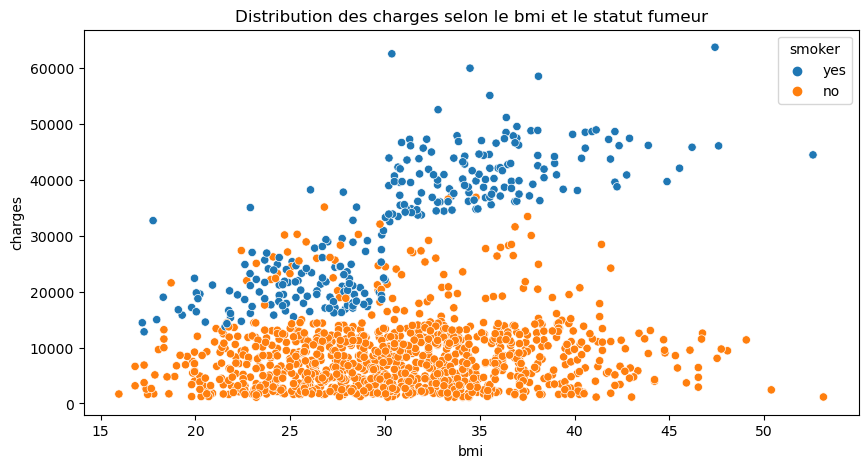

In [38]:
# dataframe avec les colonnes qui nous intéressent
data = dataset[['charges', 'bmi', 'smoker']]
data['smoker'] = data['smoker'].apply(lambda x : binary_decode(x))

plt.figure(figsize=(10,5))

plt.title("Distribution des charges selon le bmi et le statut fumeur")
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.show()

D'après le scatterplot, la variable "smoker" a un impact plus fort que la variable "bmi" puisque le nuage de points correspondant aux fumeurs se situe au dessus de celui correspondant aux non fumeurs.

On utilise de nouveau une régression linéaire multiple.

Prétraitement des données :

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

var_num = ['bmi']

var_cat = ['smoker']
col_transform = ColumnTransformer([
    ("sclal", RobustScaler(), var_num),
    
    ("one_hot_encoder",OneHotEncoder(drop="if_binary"), var_cat),
])

# On crée un pipeline
preprocessor = Pipeline([
    # on applique un transformateur de colonne 
    ('normalizer', col_transform)
])
print(data)

          charges     bmi smoker
0     16884.92400  27.900    yes
1      1725.55230  33.770     no
2      4449.46200  33.000     no
3     21984.47061  22.705     no
4      3866.85520  28.880     no
...           ...     ...    ...
1333  10600.54830  30.970     no
1334   2205.98080  31.920     no
1335   1629.83350  36.850     no
1336   2007.94500  25.800     no
1337  29141.36030  29.070    yes

[1337 rows x 3 columns]


In [40]:
from sklearn.preprocessing import StandardScaler
x = preprocessor.fit_transform()
x

array([[-0.29726516,  1.        ],
       [ 0.40071344,  0.        ],
       [ 0.30915577,  0.        ],
       ...,
       [ 0.76694411,  0.        ],
       [-0.5469679 ,  0.        ],
       [-0.15814507,  1.        ]])

In [ ]:
import statsmodels.api as smf
y= data['charges']
X_transformed = preprocessor.fit_transform(data)
col_name = preprocessor.get_feature_names_out()

X_transformed = pd.DataFrame(data=X_transformed, columns=col_name, index=y.index)
X_transformed = smf.add_constant(X_transformed)
model = smf.OLS(y, X_transformed)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1283.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.76e-311
Time:                        22:27:14   Log-Likelihood:                -13750.
No. Observations:                1337   AIC:                         2.751e+04
Df Residuals:                    1334   BIC:                         2.752e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        8342.9395    217.551     38.349      0.000    7916.160    8769.719
sclal__bmi                   3263.1374    267.341     12.206      0.000    2738.682    3787.593
one_hot_encoder__smoker_yes  2.359e+04    480.242     49.116      0.000    2.26e+04    2.45e+04
==============================================================================
Omnibus:                      153.447   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.835
Skew:                           0.805   Prob(JB):                     1.37e-52
Kurtosis:                       4.303   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Selon les résultats de la régression, "smoker" et "bmi" semblent être des facteurs significatifs pour expliquer la variable cible "charges".<br> 
En particulier, les individus qui sont identifiés comme fumeurs paieront en moyenne 23590$ de plus en charges que les individus qui ne le sont pas. Ainsi, cela confirme bien les observations faites avec le nuage points.<br>
Les p_values sont très faibles, ce qui indique que la relation entre ces variables et les charges est statistiquement significative.<br> 
Le coefficient de détermination R2 vaut 0,658, ce qui signifie que ces variables expliquent environ 65,8 % la variance des charges.

## 3.3. Charges en fonction de l'âge et du nombre d'enfants

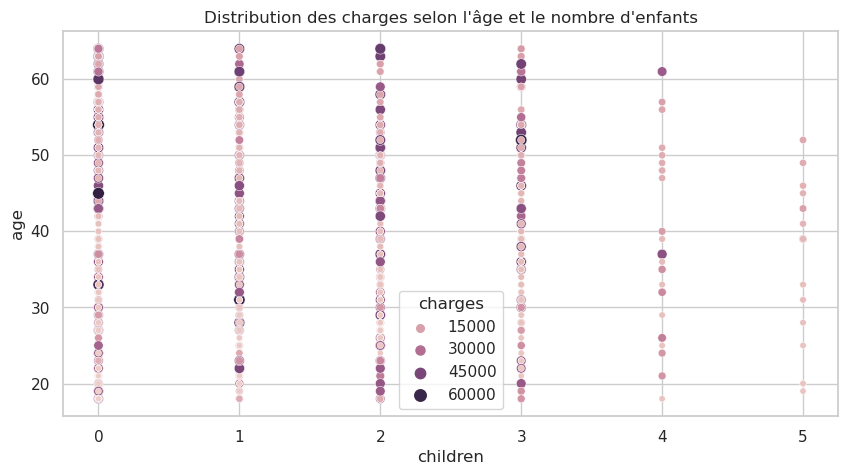

In [ ]:
# dataframe avec les colonnes qui nous intéressent
data = dataset[['charges', 'age', 'children']]

plt.figure(figsize=(10,5))

plt.title("Distribution des charges selon l'âge et le nombre d'enfants")
sns.scatterplot(x='children', y='age', hue='charges', data=data, size='charges')
plt.show()

On va s'aider d'une régression multiple pour interpréter cette visualisation :

D'après cette régression, il semble que l'âge et le nombre d'enfants soient liés aux charges, car leur p_values sont inférieures à 0,05. Cela signifie qu'il y a une relation significative entre ces deux variables et les charges.<br>
En revanche, ces variables combinées explique seulement 9,2% la variance des "charges".


## 3.4. Charges en fonction du statut fumeur et la région

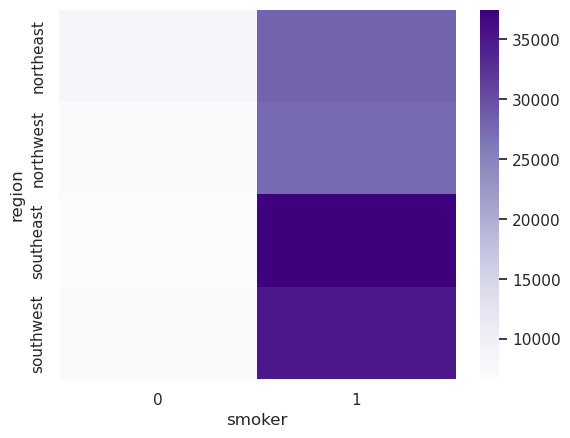

In [ ]:
contingency_table = pd.crosstab(dataset['region'], dataset['smoker'], values=dataset['charges'],aggfunc='median')

# Création du heatmap
sns.heatmap(contingency_table, cmap='Purples')

# Affichage du heatmap
plt.show()

In [ ]:
var_cat = ['smoker','region']
col_transform = ColumnTransformer([
    ("one_hot_encoder",OneHotEncoder(), var_cat),
])

# On crée un pipeline
preprocessor = Pipeline([
    # on applique un transformateur de colonne 
    ('normalizer', col_transform)
])

In [ ]:
y= data['charges']
X_transformed = preprocessor.fit_transform(dataset[['charges','smoker','region']])
col_name = preprocessor.get_feature_names_out()

X_transformed = pd.DataFrame(data=X_transformed, columns=col_name, index=y.index)
X_transformed = smf.add_constant(X_transformed)
model = smf.OLS(y, X_transformed)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     543.9
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          3.51e-278
Time:                        22:27:15   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.765e+04
Df Residuals:                    1332   BIC:                         2.768e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.155e+04    145.168     79.587      0.000    1.13e+04    1.18e+04
one_hot_encoder__smoker_0         -6002.7855    218.829    -27.431      0.000   -6432.073   -5573.498
one_hot_encoder__smoker_1          1.756e+04    302.585     58.021      0.000     1.7e+04    1.81e+04
one_hot_encoder__region_northeast  2983.9050    360.114      8.286      0.000    2277.453    3690.357
one_hot_encoder__region_northwest  2682.7795    361.166      7.428      0.000    1974.262    3391.297
one_hot_encoder__region_southeast  3294.9480    344.188      9.573      0.000    2619.738    3970.158
one_hot_encoder__region_southwest  2591.8525    360.773      7.184      0.000    1884.107    3299.598
==============================================================================
Omnibus:                      134.741   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.520
Skew:                           0.724   Prob(JB):                     3.19e-46
Kurtosis:                       4.290   Cond. No.                     5.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Conclusion : 

### Notre analyse a montré que la variable "smoker" a un fort impact sur le montant des "charges".<br> L'âge et le bmi influent aussi sur cette variable, en revanche le sexe et la région ne sont pas des critères pertinents dans notre jeu de données. Le nombre d'enfants peut avoir un impact s'il est considéré avec d'autres variables plus importantes comme l'âge ou le statut fumeur par exemple.